In [26]:
from statsmodels.regression.rolling import RollingOLS
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas as pd
from pandas.plotting import scatter_matrix
import pandas_ta
import warnings
warnings.filterwarnings('ignore')

In [27]:
import yfinance as yf
import pandas as pd

# Daftar ticker untuk mata uang kripto terkenal
# Format yang digunakan yfinance adalah 'TICKER-USD'
crypto_tickers = [
    'RLCO.TA'
]

# Menentukan Batas df yang akan diambil dan batas akhir dfnya 
start_date = '2021-09-28'
end_date = '2025-09-30'  # yfinance akan mengambil df hingga hari terakhir yang tersedia

# Gunakan paket dari yfinance untuk mengunduh df agar lebih mudah 
# `group_by='ticker'` kode ini akan menghasilkan struktur MultiIndex yang sama 
print(f"Mengunduh df untuk {crypto_tickers}...")
df = yf.download(crypto_tickers, start=start_date, end=end_date, group_by='ticker')

# df yang dihasilkan akan memiliki struktur yang sama 
print("\n--- df yang berhasil diunduh ---")
print(df)

print("\n--- df spesifik untuk tanggal 2015-09-29 ---")
try:
    specific_date_df = df.loc['2015-09-29']
    print(specific_date_df)
except KeyError:
    print("df untuk tanggal 2015-09-29 tidak ditemukan. Mungkin df untuk aset kripto tertentu belum tersedia pada tanggal tersebut.")


[*********************100%***********************]  1 of 1 completed

Mengunduh df untuk ['RLCO.TA']...

--- df yang berhasil diunduh ---
Ticker          RLCO.TA                                              
Price              Open         High          Low        Close Volume
Date                                                                 
2021-09-29  4225.051891  4377.297048  4192.214700  4218.086426   1448
2021-09-30  4338.489439  4338.489439  4194.204813  4208.135742   2533
2021-10-03  4229.032136  4229.032136  4184.254149  4208.135742   2179
2021-10-04  4278.786223  4368.342213  4208.136497  4328.539551   9490
2021-10-05  4328.539307  4466.853552  4326.549174  4381.277832   9175
...                 ...          ...          ...          ...    ...
2025-09-18  4338.000000  4338.000000  4275.000000  4311.000000   1545
2025-09-21  4350.000000  4350.000000  4251.000000  4339.000000    381
2025-09-25  4339.000000  4333.000000  4251.000000  4292.000000    591
2025-09-28  4292.000000  4300.000000  4203.000000  4283.000000   1555
2025-09-29  4298.00000

In [28]:
df

Ticker          RLCO.TA                                              
Price              Open         High          Low        Close Volume
Date                                                                 
2021-09-29  4225.051891  4377.297048  4192.214700  4218.086426   1448
2021-09-30  4338.489439  4338.489439  4194.204813  4208.135742   2533
2021-10-03  4229.032136  4229.032136  4184.254149  4208.135742   2179
2021-10-04  4278.786223  4368.342213  4208.136497  4328.539551   9490
2021-10-05  4328.539307  4466.853552  4326.549174  4381.277832   9175
...                 ...          ...          ...          ...    ...
2025-09-18  4338.000000  4338.000000  4275.000000  4311.000000   1545
2025-09-21  4350.000000  4350.000000  4251.000000  4339.000000    381
2025-09-25  4339.000000  4333.000000  4251.000000  4292.000000    591
2025-09-28  4292.000000  4300.000000  4203.000000  4283.000000   1555
2025-09-29  4298.000000  4299.000000  4180.000000  4197.000000   2478

[989 rows x 5 columns]

In [29]:
# Asumsi 'df_original' adalah dfFrame Anda dengan multi-level header
# Gabungkan dua level header menjadi satu: Ticker_Price (misalnya, 'A_Open', 'AAL_Open')
new_cols = [f'{col[0]}_{col[1]}' if col[1] else col[0] for col in df.columns]
df.columns = new_cols
# Atur kolom 'Date' sebagai kolom penentu
df = df.rename(columns={'Date': 'Date'})

In [30]:
df.columns

Index(['RLCO.TA_Open', 'RLCO.TA_High', 'RLCO.TA_Low', 'RLCO.TA_Close',
       'RLCO.TA_Volume'],
      dtype='object')

In [31]:
df

,RLCO.TA_Open,RLCO.TA_High,RLCO.TA_Low,RLCO.TA_Close,RLCO.TA_Volume
Date,,,,,
2021-09-29,4225.051891,4377.297048,4192.214700,4218.086426,1448
2021-09-30,4338.489439,4338.489439,4194.204813,4208.135742,2533
2021-10-03,4229.032136,4229.032136,4184.254149,4208.135742,2179
2021-10-04,4278.786223,4368.342213,4208.136497,4328.539551,9490
2021-10-05,4328.539307,4466.853552,4326.549174,4381.277832,9175
...,...,...,...,...,...
2025-09-18,4338.000000,4338.000000,4275.000000,4311.000000,1545
2025-09-21,4350.000000,4350.000000,4251.000000,4339.000000,381
2025-09-25,4339.000000,4333.000000,4251.000000,4292.000000,591


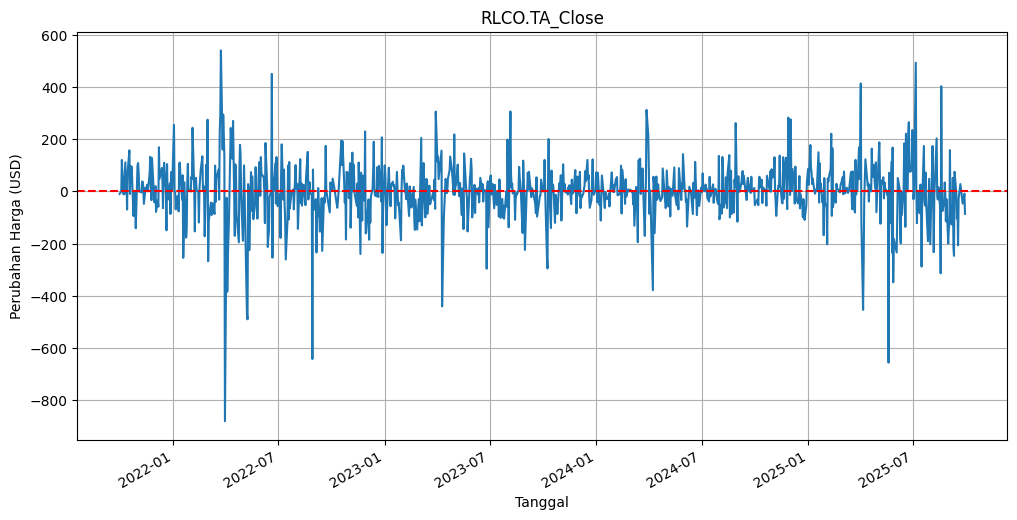

In [32]:
# Membuat plot
import matplotlib.pyplot as plt
df_return_saham = df['RLCO.TA_Close'].diff(periods=1)
plt.figure(figsize=(12, 6))
df_return_saham.plot(title='RLCO.TA_Close', grid=True)
plt.xlabel('Tanggal')
plt.ylabel('Perubahan Harga (USD)')
plt.axhline(0, color='red', linestyle='--') # Garis referensi pada nol
plt.show()

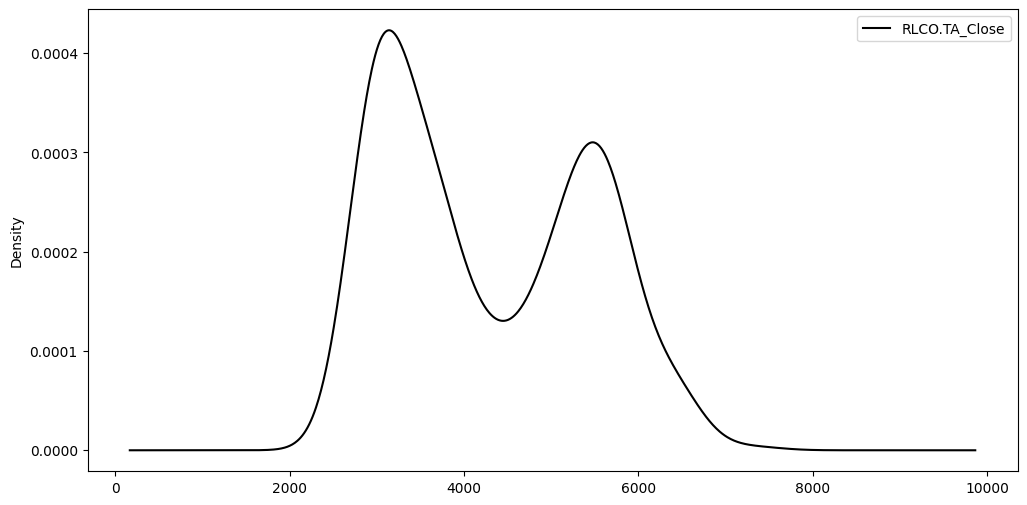

In [33]:
df['RLCO.TA_Close'].plot(kind='kde', color='black',
figsize=(12, 6),
label='RLCO.TA_Close')
plt.legend()

Plot Kernel Density Estimate (KDE) yang menunjukkan distribusi bimodal (dua puncak) pada harga penutupan saham RLCO.TA mengindikasikan bahwa data harga historis cenderung mengelompok di sekitar dua level nilai yang berbeda secara signifikan—yaitu, satu rezim harga rendah (≈3000–4000) dan satu rezim harga tinggi (≈5000–6000). Hal ini menyiratkan adanya pergeseran nilai fundamental yang besar dan permanen pada saham tersebut, kemungkinan dipicu oleh peristiwa korporasi penting, di mana pasar menilai ulang perusahaan, sehingga menciptakan dua "rumah" harga yang stabil, dengan zona di antara keduanya menjadi area transisi yang cepat dan volatil.

## Kesimpulan Analisis Distribusi Harga Saham RLCO.TA

Berdasarkan grafik Kernel Density Estimate (KDE) harga penutupan saham $RLCO.TA$, ditemukan bahwa distribusi harga memiliki karakteristik **Bimodal** (dua puncak dominan), yang mengindikasikan adanya dua rezim harga yang signifikan selama periode data yang dianalisis.

| Karakteristik | Nilai Harga (Estimasi) | Interpretasi Implikasi Investasi |
| :--- | :--- | :--- |
| **Puncak Dominan I** | $\approx 3.000 - 3.500$ | Mewakili level harga historis yang sering dicapai (Support kuat). Bisa menjadi **Area Akumulasi** yang menarik jika harga saat ini berada di atasnya. |
| **Puncak Dominan II** | $\approx 5.500 - 6.000$ | Mewakili level harga historis yang sering dicapai. Jika harga saat ini di kisaran ini, perlu dikonfirmasi apakah ini adalah **Nilai Wajar Baru** (*New Fair Value*) yang didukung fundamental. |
| **Lembah (Frekuensi Rendah)** | $\approx 4.500$ | Zona harga dengan frekuensi sangat rendah. Area ini berpotensi menjadi **Titik *Breakout***. Jika harga menembus level ini, pergerakan cepat menuju salah satu puncak berikutnya mungkin terjadi. Level ini juga logis untuk ditetapkan sebagai *Stop-Loss*. |

### Strategi Rekomendasi
1.  **Konfirmasi Fundamental:** Selidiki peristiwa apa yang memicu pergeseran dari Puncak I ke Puncak II.
2.  **Manajemen Risiko:** Gunakan level Lembah ($\approx 4.500$) sebagai patokan risiko (*stop-loss*) untuk perdagangan.
3.  **Waspada Volatilitas:** Bersiaplah untuk pergerakan harga yang cepat antar dua level puncak tersebut, karena frekuensi harga di antara keduanya sangat rendah.

<Axes: title={'center': 'Harga Penutupan RLCO.TA Seiring Waktu'}, xlabel='Date'>

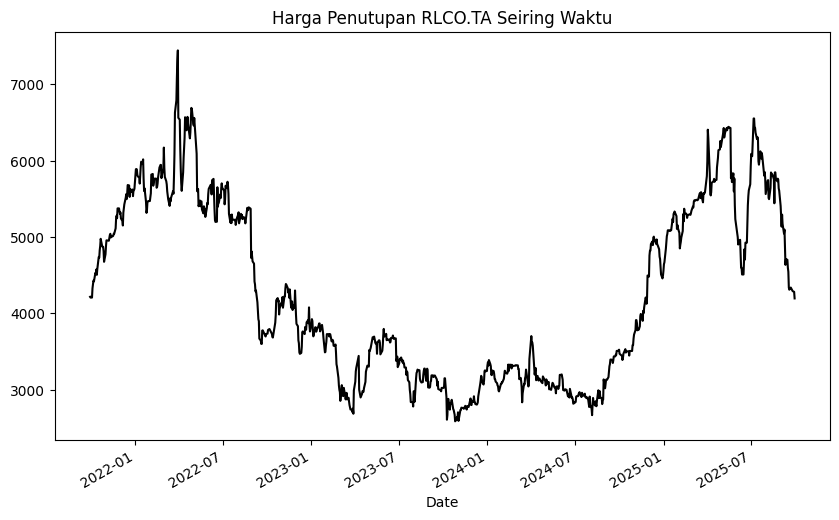

In [34]:
# Direkomendasikan untuk data deret waktu
df['RLCO.TA_Close'].plot(
    kind='line', 
    title='Harga Penutupan RLCO.TA Seiring Waktu', 
    figsize=(10, 6),
    color='black'
)

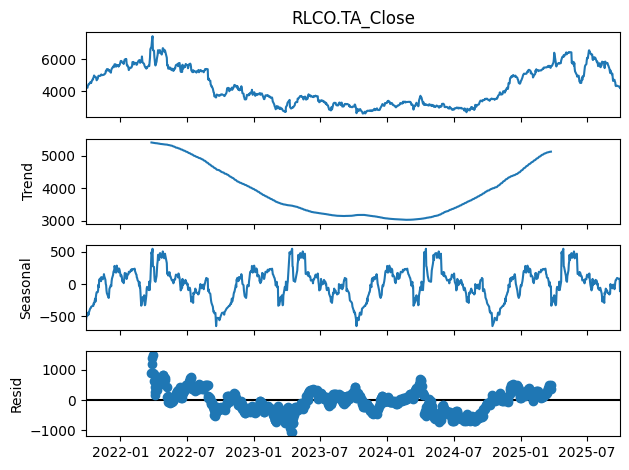

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
period = 252
s_dc = seasonal_decompose(
    df['RLCO.TA_Close'], 
    model='additive', 
    period=period # Tambahkan parameter period
)

# decomp['SDC_Cycle'] = s_dc.seasonal
# decomp['SDC_Trend'] = s_dc.trend
# decomp['SDC_Error'] = s_dc.resid
# decomp[118:122]

# Untuk melihat hasilnya, Anda bisa memanggil .plot()
s_dc.plot()
plt.show()

##  Analisis Dekomposisi Deret Waktu Saham RLCO.TA

Grafik di atas memecah harga penutupan saham $RLCO.TA$ menjadi tiga komponen utama untuk mengidentifikasi pendorong pergerakan harga.

### 1. Komponen Tren (*Trend*)

* **Pola:** Tren menunjukkan bentuk cekungan (**U-shaped**) dari awal 2022 hingga awal 2025.
* **Titik Balik:** Tren mencapai titik terendah ($\approx 3.000$) pada akhir 2023 / awal 2024.
* **Implikasi Investasi:** Tren saat ini berada dalam fase **kenaikan kuat** (Bullish). Ini menunjukkan adanya sentimen positif atau perbaikan fundamental jangka panjang sejak awal 2024. Ini adalah sinyal positif yang kuat.

### 2. Komponen Musiman (*Seasonal*)

* **Pola:** Fluktuasi yang relatif konsisten di sekitar garis nol.
* **Implikasi Investasi:** Komponen ini menunjukkan adanya pola variasi harga yang berulang dalam periode waktu tertentu, yang berkontribusi pada **volatilitas jangka pendek**. Trader perlu mempertimbangkan pola ini untuk *timing* masuk/keluar.

### 3. Komponen Residu (*Residual*)

* **Pola:** Menunjukkan kejutan atau anomali harga yang tidak dijelaskan oleh Tren dan Musiman.
* **Implikasi Investasi:** Perhatikan periode di mana residu tinggi (jauh di atas nol), seperti pada awal 2022 dan akhir 2024. Ini mungkin menunjukkan harga saat itu *over-extended* karena berita mendadak atau sentimen euforia, dan berpotensi memicu koreksi jangka pendek.

---

###  Rekomendasi Holistik (Gabungan KDE & Dekomposisi)

1.  **Konfirmasi Puncak KDE:** Titik balik tren terendah ($\approx 3.000$) sesuai dengan Puncak I pada grafik KDE, memperkuat bahwa ini adalah level *support* historis yang kuat.
2.  **Strategi Utama:** Manfaatkan **Tren Kenaikan Kuat** yang sedang berlangsung sejak awal 2024. Posisi *long* (beli) didukung oleh momentum ini.
3.  **Level Kritis:** Gunakan titik terendah tren ($\approx 3.000$) sebagai referensi untuk menetapkan ***stop-loss* yang konservatif** jika terjadi pembalikan tren.

In [36]:
from statsmodels.tsa.statespace.structural import UnobservedComponents 
uc_model = UnobservedComponents(
    df['RLCO.TA_Close'],
    # Level: 'lltrend' (Local Linear Trend) memiliki level dan slope yang stochastik
    level='lltrend', 
    # Cycle: Tambahkan siklus (periodik)
    cycle=True,
    # Stochastic Cycle: Memungkinkan siklus berubah seiring waktu
    stochastic_cycle=True
)

# Fitting Model: 
# Metode 'powell' adalah salah satu optimizer, tetapi seringkali 'lbfgs' 
# atau 'statespace' lebih disarankan untuk model state space.
# Pengaturan 'disp=False' (atau dihilangkan) akan membuat proses fitting lebih rapi.

res_uc = uc_model.fit(
    method='lbfgs', # Ganti 'powell' dengan 'lbfgs' atau biarkan default jika memungkinkan
    disp=False       # Matikan tampilan proses iterasi
)

# Menampilkan Ringkasan Hasil
print(res_uc.summary())

                        Unobserved Components Results                         
Dep. Variable:          RLCO.TA_Close   No. Observations:                  989
Model:             local linear trend   Log Likelihood               -6043.751
                   + stochastic cycle   AIC                          12097.501
Date:                Wed, 03 Dec 2025   BIC                          12121.964
Time:                        05:12:40   HQIC                         12106.806
Sample:                             0                                         
                                - 989                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0004    289.623   1.47e-06      1.000    -567.649     567.650
sigma2.level       718.8998    309

In [37]:
import pmdarima as pm
model = pm.auto_arima(df['RLCO.TA_Close'], seasonal=True,
stepwise=True, m=12)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  989
Model:               SARIMAX(5, 1, 0)   Log Likelihood               -6045.238
Date:                Wed, 03 Dec 2025   AIC                          12102.475
Time:                        05:19:50   BIC                          12131.850
Sample:                             0   HQIC                         12113.646
                                - 989                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0825      0.024      3.446      0.001       0.036       0.129
ar.L2          0.0562      0.023      2.398      0.016       0.010       0.102
ar.L3          0.0468      0.028      1.678      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  989
Model:               SARIMAX(5, 1, 0)   Log Likelihood               -6045.238
Date:                Wed, 03 Dec 2025   AIC                          12102.475
Time:                        05:38:05   BIC                          12131.850
Sample:                             0   HQIC                         12113.646
                                - 989                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0825      0.024      3.446      0.001       0.036       0.129
ar.L2          0.0562      0.023      2.398      0.016       0.010       0.102
ar.L3          0.0468      0.028      1.678      0.0

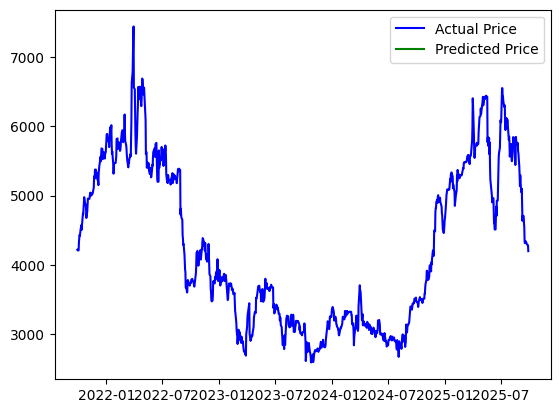

            PredPrice
2020-01-31        NaN
2020-02-29        NaN
2020-03-31        NaN
2020-04-30        NaN
2020-05-31        NaN
2020-06-30        NaN
2020-07-31        NaN
2020-08-31        NaN
2020-09-30        NaN
2020-10-31        NaN
2020-11-30        NaN
2020-12-31        NaN
2021-01-31        NaN
2021-02-28        NaN
2021-03-31        NaN
2021-04-30        NaN
2021-05-31        NaN
2021-06-30        NaN
2021-07-31        NaN
2021-08-31        NaN
2021-09-30        NaN
2021-10-31        NaN
2021-11-30        NaN
2021-12-31        NaN
2022-01-31        NaN
2022-02-28        NaN
2022-03-31        NaN
2022-04-30        NaN
2022-05-31        NaN
2022-06-30        NaN
2022-07-31        NaN
2022-08-31        NaN
2022-09-30        NaN
2022-10-31        NaN
2022-11-30        NaN
2022-12-31        NaN
2023-01-31        NaN
2023-02-28        NaN
2023-03-31        NaN
2023-04-30        NaN
2023-05-31        NaN
2023-06-30        NaN
2023-07-31        NaN
2023-08-31        NaN
2023-09-30

In [44]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pmdarima as pm

# Asumsi df adalah DataFrame dengan kolom 'RLCO.TA_Close' dan index datetime.
# Jika belum ada, pastikan df dimuat sebelumnya, misalnya df = pd.read_csv('data.csv', index_col='Date', parse_dates=True)

# Buat model ARIMA otomatis menggunakan pmdarima
model = pm.auto_arima(df['RLCO.TA_Close'], seasonal=True, stepwise=True, m=12)
print(model.summary())

# Perbaikan: Gunakan pd.date_range karena sm.tsa.datetools.dates_from_range sudah deprecated.
# '2020m1' berarti mulai dari Januari 2020, length=48 berarti 48 bulan (sampai Desember 2023).
# Asumsi kita memprediksi 48 bulan ke depan dari akhir df.
extended_dataset = pd.DataFrame(index=pd.date_range(start='2020-01-01', periods=48, freq='M'))

# Prediksi 48 langkah ke depan dengan interval kepercayaan
# Untuk pmdarima, gunakan model.predict(n_periods=48, return_conf_int=True, alpha=0.05)
extended_dataset['PredPrice'], conf_int = model.predict(n_periods=48, return_conf_int=True, alpha=0.05)

# Plotting: Asumsi dataset adalah df untuk konsistensi
plt.plot(df['RLCO.TA_Close'], c='blue', label='Actual Price')
plt.plot(extended_dataset['PredPrice'], c='green', label='Predicted Price')
plt.legend()
plt.show()

# Print hasil
print(extended_dataset)
print(conf_int)
